In [1]:
from datetime import date
import os
import zipfile
from google.colab import drive #Mount Google Drive
import pandas as pd # many functions and methodsexpedite the data analysis process, data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # standard trigonometric functions, functions for arithmetic operations, handling complex numbers, etc
import seaborn as sns # used for data visualization and exploratory data analysis
import matplotlib.pyplot as plt # Matplotlib module which provides a MATLAB-like interface
from pandas import to_datetime #This function converts a scalar, array-like, Series or DataFrame /dict-like to a pandas datetime object.
from pandas import DataFrame #a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score # the mean squared error (MSE) is an estimator measures the average of the squares of the errors, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range.
from sklearn.model_selection import train_test_split
from math import log

#Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Dense, Dropout, RepeatVector
from keras.optimizers import Nadam, Adam, RMSprop, SGD, Adamax
from keras.utils.vis_utils import plot_model

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/traffic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/traffic')

In [4]:
dataset = pd.read_csv('/tmp/traffic/covid_impact_on_airport_traffic.csv')
dataset["Date"]=pd.to_datetime(dataset["Date"])
dataset.sort_values(by='Date', ascending=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [5]:
dataset = dataset.drop(columns = ['AggregationMethod','Version','Centroid', 'Geography'])

In [6]:
dataset.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
0,2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,CL,Chile
1,2020-03-16,Halifax International,72,Halifax,Nova Scotia,CA-NS,Canada
2,2020-03-16,Hartsfield-Jackson Atlanta International,92,College Park,Georgia,US-GA,United States of America (the)
3,2020-03-16,Los Angeles International,98,Los Angeles,California,US-CA,United States of America (the)
4,2020-03-16,McCarran International,68,Paradise,Nevada,US-NV,United States of America (the)


In [7]:
dataset.tail()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
7242,2020-12-02,Los Angeles International,81,Los Angeles,California,US-CA,United States of America (the)
7243,2020-12-02,Boston Logan International,66,Boston,Massachusetts,US-MA,United States of America (the)
7244,2020-12-02,Calgary International,99,Calgary,Alberta,CA-AB,Canada
7245,2020-12-02,Winnipeg International,100,Winnipeg,Manitoba,CA-MB,Canada
7246,2020-12-02,Montreal Mirabel,100,Mirabel,Quebec,CA-QC,Canada


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               7247 non-null   datetime64[ns]
 1   AirportName        7247 non-null   object        
 2   PercentOfBaseline  7247 non-null   int64         
 3   City               7247 non-null   object        
 4   State              7247 non-null   object        
 5   ISO_3166_2         7247 non-null   object        
 6   Country            7247 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 396.4+ KB


In [9]:
dataset.shape

(7247, 7)

In [10]:
dataset.columns

Index(['Date', 'AirportName', 'PercentOfBaseline', 'City', 'State',
       'ISO_3166_2', 'Country'],
      dtype='object')

In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.isnull().sum()

Date                 0
AirportName          0
PercentOfBaseline    0
City                 0
State                0
ISO_3166_2           0
Country              0
dtype: int64

In [13]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PercentOfBaseline,7247.0,66.651442,22.134433,0.0,53.0,67.0,84.0,100.0


In [14]:
dataset["Country"].unique()

array(['Chile', 'Canada', 'United States of America (the)', 'Australia'],
      dtype=object)

In [15]:
dataset.groupby("Country")[['State','City','AirportName']].nunique()

,State,City,AirportName
Country,,,
Australia,1,1,1
Canada,6,9,9
Chile,1,1,1
United States of America (the),15,16,17


In [16]:
dataset["City"].unique()

array(['Santiago', 'Halifax', 'College Park', 'Los Angeles', 'Paradise',
       'Charlotte', 'Chicago', 'Leduc County', 'Floris', 'SeaTac',
       'Mirabel', 'Richmond', 'Urban Honolulu', 'New York',
       'Miami Springs', 'South San Francisco', 'Grapevine', 'Newark',
       'Sydney', 'Dorval', 'Romulus', 'Hamilton', 'Denver', 'Mississauga',
       'Winnipeg', 'Boston', 'Calgary'], dtype=object)

In [17]:
dataset.groupby("AirportName")["Country"].count()

AirportName
Boston Logan International                   261
Calgary International                        261
Charlotte Douglas International              261
Chicago OHare International                  261
Dallas/Fort Worth International              262
Daniel K. Inouye International               261
Denver International                         261
Detroit Metropolitan Wayne County            261
Edmonton International                       236
Halifax International                        252
Hamilton International                       260
Hartsfield-Jackson Atlanta International     262
John F. Kennedy International                262
Kingsford Smith                              257
LaGuardia                                    261
Los Angeles International                    262
McCarran International                       261
Miami International                          261
Montreal Mirabel                             257
Montreal Trudeau                             262
Newark L

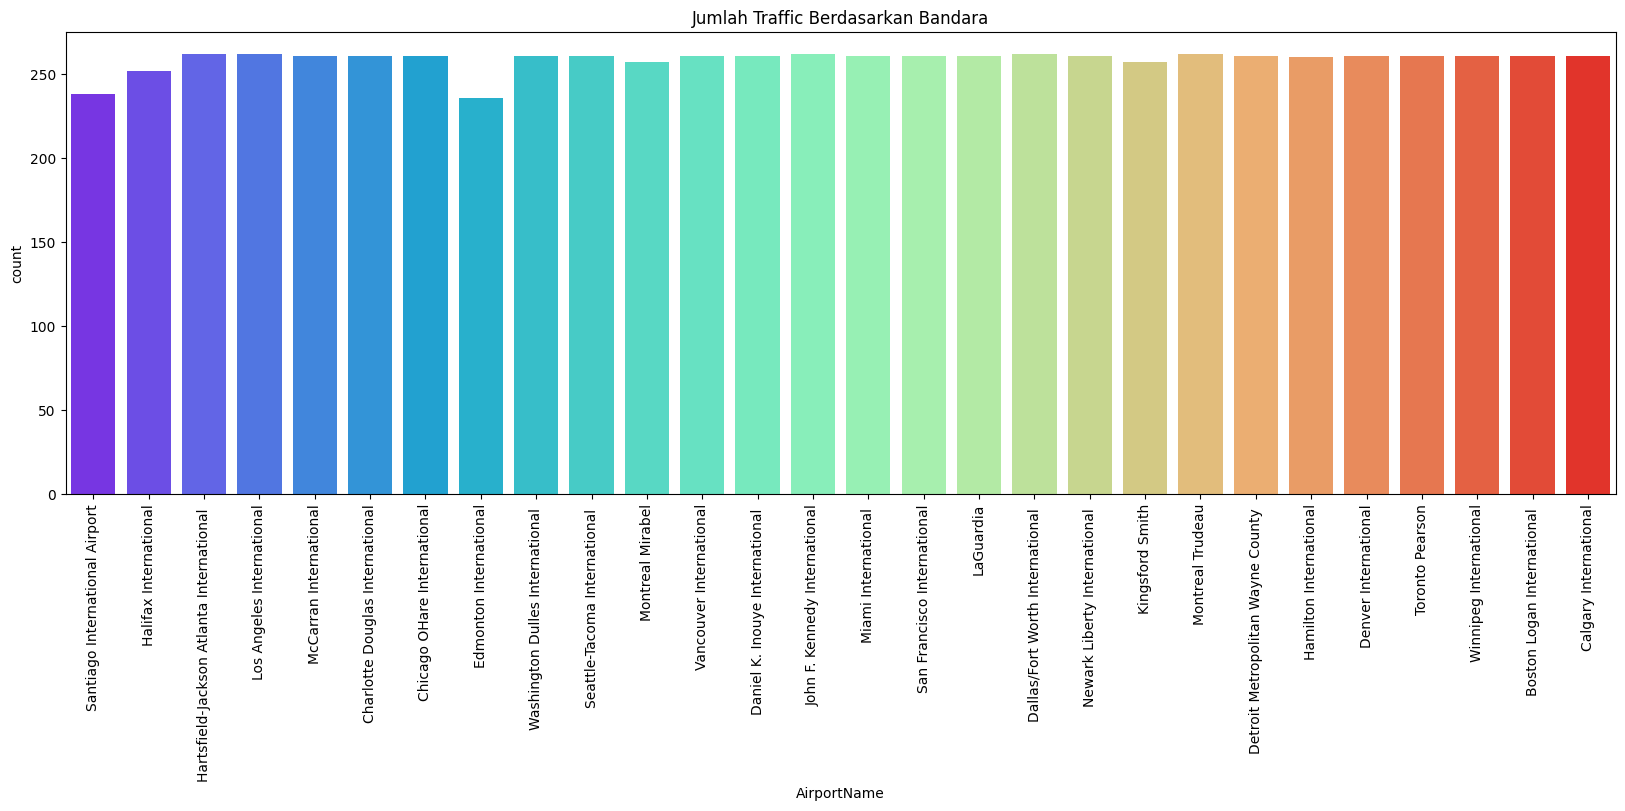

In [18]:
plt.figure(figsize=(20,6))
figure1 = sns.countplot(x = 'AirportName', data = dataset , palette='rainbow')
figure1.set_xticklabels(figure1.get_xticklabels(), rotation=90)
figure1.set_title("Jumlah Traffic Berdasarkan Bandara")
plt.show();

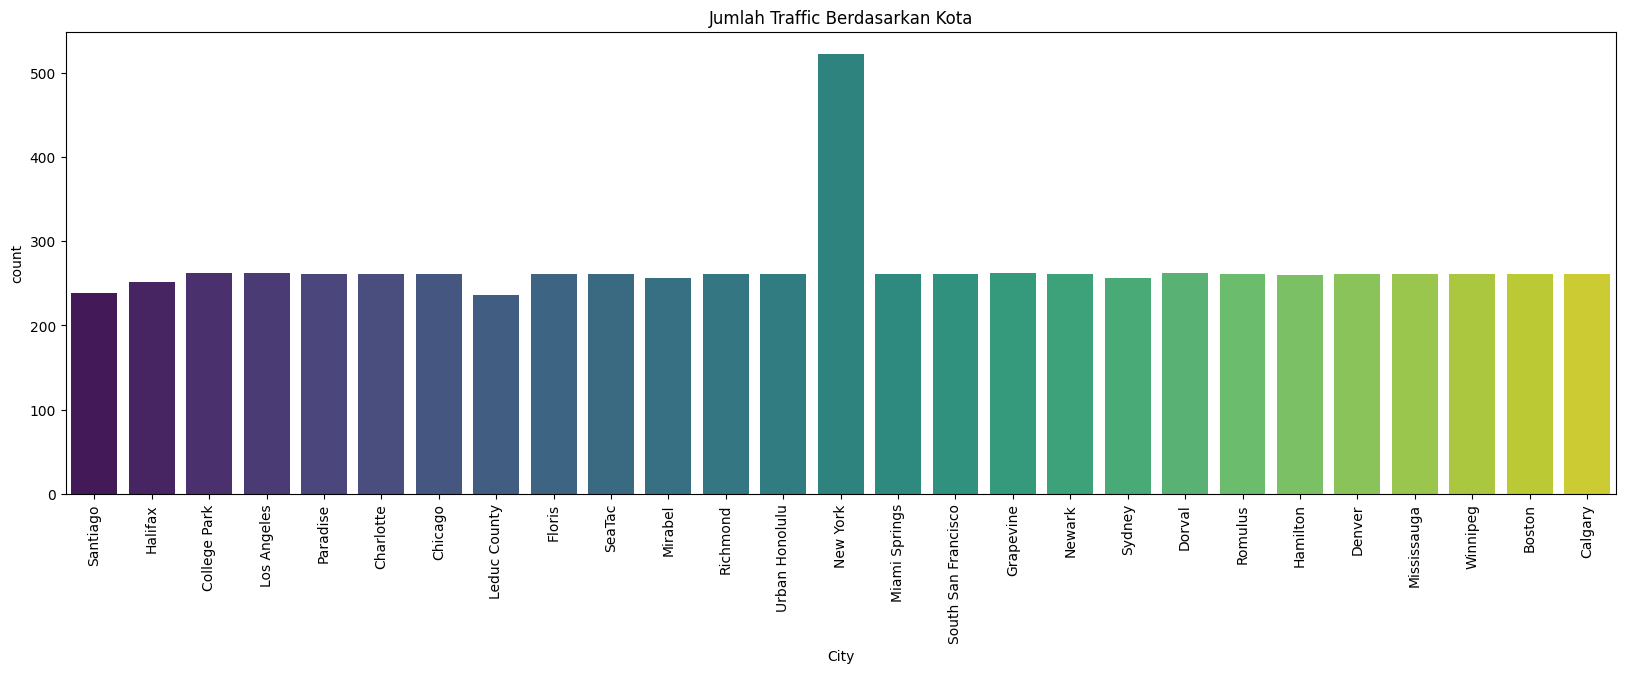

In [19]:
plt.figure(figsize=(20,6))
figure2 = sns.countplot(x = 'City', data = dataset , palette='viridis')
figure2.set_xticklabels(figure2.get_xticklabels(), rotation=90)
figure2.set_title("Jumlah Traffic Berdasarkan Kota")
plt.show();

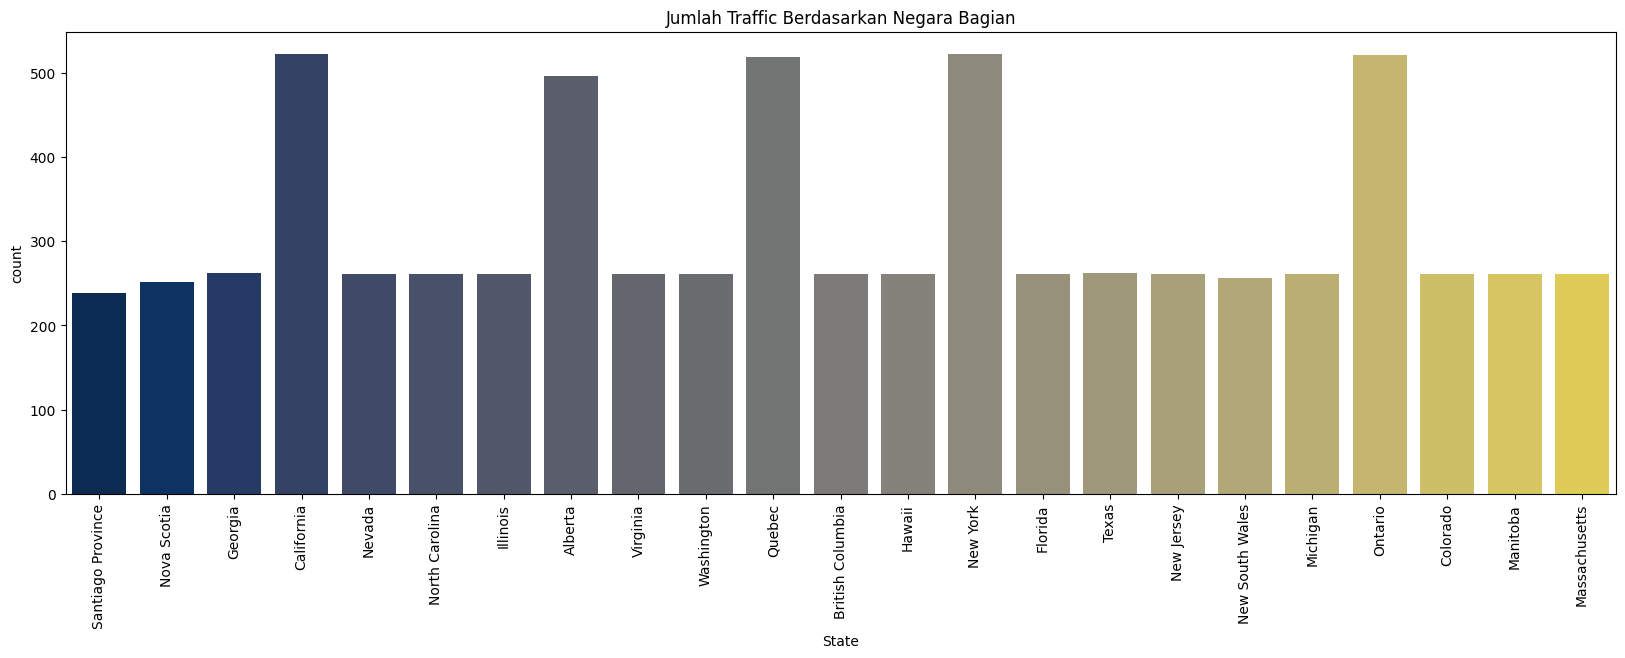

In [20]:
plt.figure(figsize=(20,6))
figure3 = sns.countplot(x = 'State', data = dataset , palette='cividis')
figure3.set_xticklabels(figure3.get_xticklabels(), rotation=90)
figure3.set_title("Jumlah Traffic Berdasarkan Negara Bagian")
plt.show();

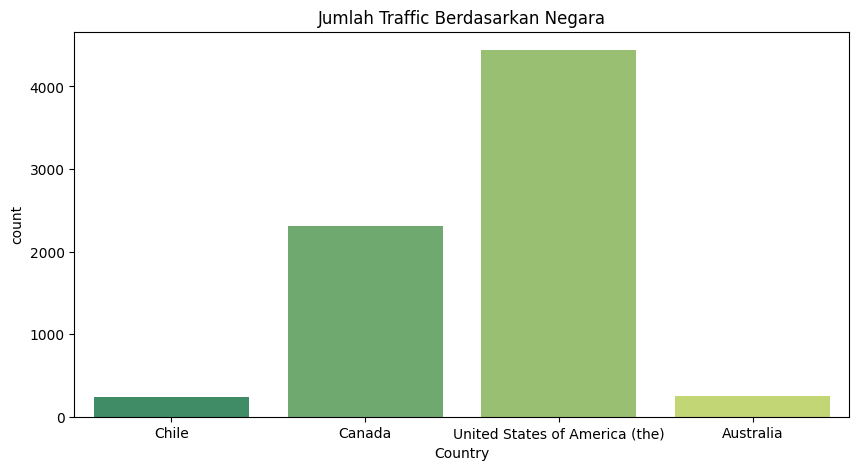

In [21]:
plt.figure(figsize=(10,5))
figure4 = sns.countplot(x = 'Country', data = dataset , palette='summer')
figure4.set_xticklabels(figure4.get_xticklabels())
figure4.set_title("Jumlah Traffic Berdasarkan Negara")
plt.show();

**DATASET USA**

In [22]:
dataset_US = dataset[dataset['Country']=='United States of America (the)'].sort_values(by="Date")
dataset_US.shape

(4441, 7)

In [23]:
dataset_US.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
2,2020-03-16,Hartsfield-Jackson Atlanta International,92,College Park,Georgia,US-GA,United States of America (the)
26,2020-03-16,Boston Logan International,97,Boston,Massachusetts,US-MA,United States of America (the)
23,2020-03-16,Denver International,94,Denver,Colorado,US-CO,United States of America (the)
21,2020-03-16,Detroit Metropolitan Wayne County,73,Romulus,Michigan,US-MI,United States of America (the)
18,2020-03-16,Newark Liberty International,100,Newark,New Jersey,US-NJ,United States of America (the)


In [24]:
dataset_US.tail()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
7221,2020-12-02,Detroit Metropolitan Wayne County,58,Romulus,Michigan,US-MI,United States of America (the)
7220,2020-12-02,Daniel K. Inouye International,63,Urban Honolulu,Hawaii,US-HI,United States of America (the)
7242,2020-12-02,Los Angeles International,81,Los Angeles,California,US-CA,United States of America (the)
7232,2020-12-02,Charlotte Douglas International,91,Charlotte,North Carolina,US-NC,United States of America (the)
7243,2020-12-02,Boston Logan International,66,Boston,Massachusetts,US-MA,United States of America (the)


In [25]:
dataset_US.nunique()

Date                 262
AirportName           17
PercentOfBaseline     92
City                  16
State                 15
ISO_3166_2            15
Country                1
dtype: int64

In [26]:
dataset_US = dataset_US.set_index('Date')

In [27]:
df_USA = pd.DataFrame(dataset_US.groupby('Date')['PercentOfBaseline'].mean())
df_USA.shape

(262, 1)

In [28]:
df_USA.head()

,PercentOfBaseline
Date,
2020-03-16,88.058824
2020-03-17,87.823529
2020-03-18,81.705882
2020-03-19,73.764706
2020-03-20,73.058824


**Model USA LSTM**

In [29]:
training_set1=df_USA['PercentOfBaseline']
training_set1=pd.DataFrame(training_set1)

In [30]:
# Feature Scaling
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [31]:
# Creating a data structure with 52 timesteps and 1 output
size_train1  = int(len(df_USA['PercentOfBaseline'])*0.2)
X_train1 = []
y_train1 = []
for i in range(size_train1, len(training_set_scaled1)):
    X_train1.append(training_set_scaled1[i-size_train1:i, 0])
    y_train1.append(training_set_scaled1[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

In [32]:
# Reshaping
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1, y_train1, test_size = 0.2, shuffle=True, random_state=42)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
X_train1.shape

(168, 52, 1)

In [33]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss'
                                            , patience = 2
                                            , verbose=1
                                            , factor=0.75
                                            , min_lr=0.000001)

In [34]:
# Initialising the RNN using LSTM
model_USA_LSTM = Sequential()
model_USA_LSTM.add(Bidirectional(LSTM(64, activation='relu', return_sequences = True, input_shape = (X_train1.shape[1], 1))))
model_USA_LSTM.add(Dropout(0.2))
model_USA_LSTM.add(Bidirectional(LSTM(32, activation='relu', return_sequences = False)))
model_USA_LSTM.add(Dense(1))
input_shape1 = X_train1.shape
model_USA_LSTM.build(input_shape1)
model_USA_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (168, 52, 128)           33792     
 l)                                                              
                                                                 
 dropout (Dropout)           (168, 52, 128)            0         
                                                                 
 bidirectional_1 (Bidirectio  (168, 64)                41216     
 nal)                                                            
                                                                 
 dense (Dense)               (168, 1)                  65        
                                                                 
Total params: 75,073
Trainable params: 75,073
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compiling the RNN
# Code here
model_USA_LSTM.compile(optimizer=Nadam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

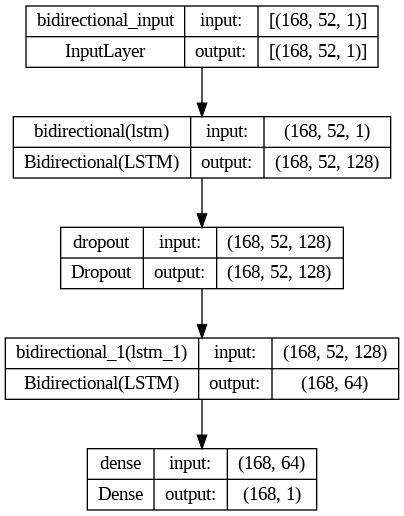

In [36]:
plot_model(model_USA_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history1 = model_USA_LSTM.fit(X_train1, y_train1, epochs=epoch, batch_size=batch_size, validation_data=(X_test1, y_test1), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 8s 498ms/step - loss: 0.6990 - mse: 0.5006 - rmse: 0.7076 - val_loss: 0.6633 - val_mse: 0.4513 - val_rmse: 0.6718 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 172ms/step - loss: 0.6304 - mse: 0.4080 - rmse: 0.6387 - val_loss: 0.5817 - val_mse: 0.3490 - val_rmse: 0.5907 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 142ms/step - loss: 0.5356 - mse: 0.2966 - rmse: 0.5446 - val_loss: 0.4212 - val_mse: 0.1857 - val_rmse: 0.4309 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 131ms/step - loss: 0.3055 - mse: 0.1106 - rmse: 0.3326 - val_loss: 0.2850 - val_mse: 0.0897 - val_rmse: 0.2994 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 158ms/step - loss: 0.1834 - mse: 0.0576 - rmse: 0.2400 - val_loss: 0.0938 - val_mse: 0.0146 - val_rmse: 0.1208 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 150ms/step - loss: 0.0977 - mse: 0.0191 - rmse: 0.1382 - val_l

In [38]:
yhat1 = model_USA_LSTM.predict(X_test1)

r21 = r2_score(y_test1,yhat1)
mse1 = mean_squared_error(y_test1, yhat1)
mae1 = mean_absolute_error(y_test1, yhat1)
mape1 = mean_absolute_percentage_error(y_test1, yhat1)
rmse1 = np.sqrt(mse1)

print("MAE : ","%.4f" % mae1)
print("MSE : ","%.4f" %  mse1)
print("RMSE : ","%.4f" % rmse1)
print("MAPE : ","%.4f" % mape1)
print("R2_score : ","%.4f" % r21)

2/2 [==============================] - 1s 28ms/step
MAE :  0.0551
MSE :  0.0071
RMSE :  0.0841
MAPE :  0.0983
R2_score :  0.4142


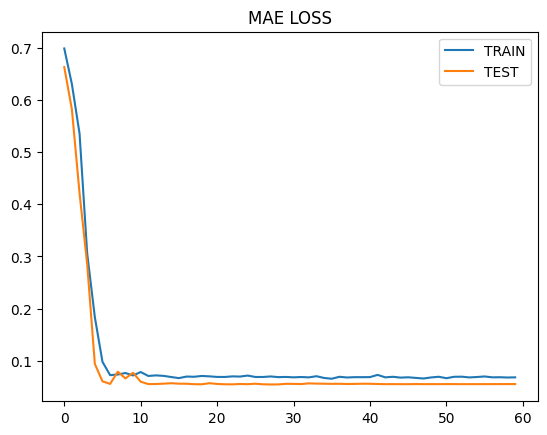

In [39]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [40]:
test_set1 = df_USA['PercentOfBaseline']
test_set1=pd.DataFrame(test_set1)
test_set1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [41]:
# Getting the predicted PercentOfBaseline
size_test1 = int(len(df_USA['PercentOfBaseline'])) + size_train1
dataset_total1 = pd.concat((training_set1['PercentOfBaseline'], test_set1['PercentOfBaseline']), axis = 0)
inputs1 = dataset_total1[len(dataset_total1) - len(test_set1) - size_train1:].values
inputs1 = inputs1.reshape(-1,1)
inputs1 = sc1.transform(inputs1)
X_test1 = []
for i in range(size_train1, size_test1):
    X_test1.append(inputs1[i-size_train1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
predicted_LSTM_USA = model_USA_LSTM.predict(X_test1)
predicted_LSTM_USA = sc1.inverse_transform(predicted_LSTM_USA)

4/9 [============>.................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 22ms/step


**Model USA ConvLSTM**

In [42]:
training_set2=df_USA['PercentOfBaseline']
training_set2=pd.DataFrame(training_set2)

In [43]:
# Feature Scaling
sc2 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled2 = sc2.fit_transform(training_set2)

In [44]:
# Creating a data structure with 52 timesteps and 1 output
X_train2 = []
y_train2 = []
size_train2 = int(len(df_USA['PercentOfBaseline'])*0.2)
for i in range(size_train2, len(training_set2)):
    X_train2.append(training_set_scaled2[i-size_train2:i, 0])
    y_train2.append(training_set_scaled2[i, 0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

In [45]:
# Reshaping
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.2, random_state = 42)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
X_train2.shape

(168, 52, 1)

In [46]:
# Initialising the CNN using LSTM
model_USA_ConvLSTM = Sequential()
model_USA_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train2.shape[1],1)))
model_USA_ConvLSTM.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
model_USA_LSTM.add(Dropout(0.2))
model_USA_ConvLSTM.add(Bidirectional(LSTM(64, activation='relu', return_sequences = True)))
model_USA_ConvLSTM.add(Bidirectional(LSTM(32, activation='relu', return_sequences = False)))
model_USA_ConvLSTM.add(Dense(1))
input_shape2 = X_train2.shape
model_USA_ConvLSTM.build(input_shape2)
model_USA_ConvLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 52, 64)           0         
 )                                                               
                                                                 
 bidirectional_2 (Bidirectio  (None, 52, 128)          66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [47]:
# Compiling the RNN
# Code here
model_USA_ConvLSTM.compile(optimizer=Nadam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

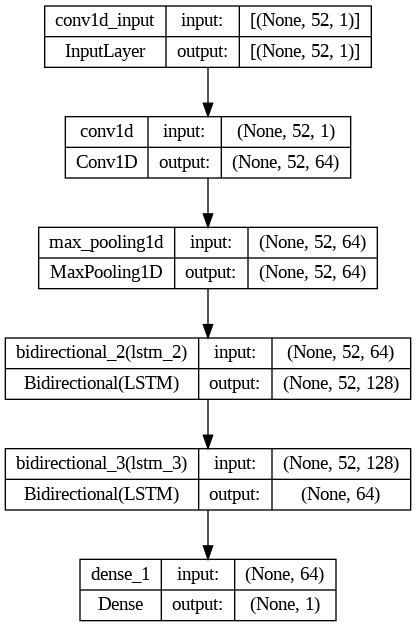

In [48]:
plot_model(model_USA_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [49]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history2 = model_USA_ConvLSTM.fit(X_train2, y_train2, epochs=epoch, batch_size=batch_size, validation_data=(X_test2, y_test2), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 9s 775ms/step - loss: 0.7262 - mse: 0.5395 - rmse: 0.7345 - val_loss: 0.6712 - val_mse: 0.4620 - val_rmse: 0.6797 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 163ms/step - loss: 0.6278 - mse: 0.4055 - rmse: 0.6368 - val_loss: 0.5477 - val_mse: 0.3104 - val_rmse: 0.5571 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 162ms/step - loss: 0.4697 - mse: 0.2341 - rmse: 0.4839 - val_loss: 0.2307 - val_mse: 0.0570 - val_rmse: 0.2387 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 159ms/step - loss: 0.1493 - mse: 0.0331 - rmse: 0.1819 - val_loss: 0.1410 - val_mse: 0.0261 - val_rmse: 0.1616 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 167ms/step - loss: 0.1271 - mse: 0.0257 - rmse: 0.1603 - val_loss: 0.0596 - val_mse: 0.0085 - val_rmse: 0.0920 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 145ms/step - loss: 0.0704 - mse: 0.0134 - rmse: 0.1158 - val_l

In [50]:
yhat2 = model_USA_ConvLSTM.predict(X_test2)

r22 = r2_score(y_test2,yhat2)
mse2 = mean_squared_error(y_test2, yhat2)
mae2 = mean_absolute_error(y_test2,yhat2)
mape2 = mean_absolute_percentage_error(y_test2,yhat2)
rmse2 = np.sqrt(mse2)

print("MAE :" ,"%.4f" %mae2)
print("MSE :", "%.4f" %mse2)
print("RMSE :" ,"%.4f" %rmse2)
print("MAPE :" ,"%.4f" %mape2)
print("R2_score :","%.4f" %r22)

2/2 [==============================] - 1s 19ms/step
MAE : 0.0529
MSE : 0.0074
RMSE : 0.0861
MAPE : 0.0975
R2_score : 0.3856


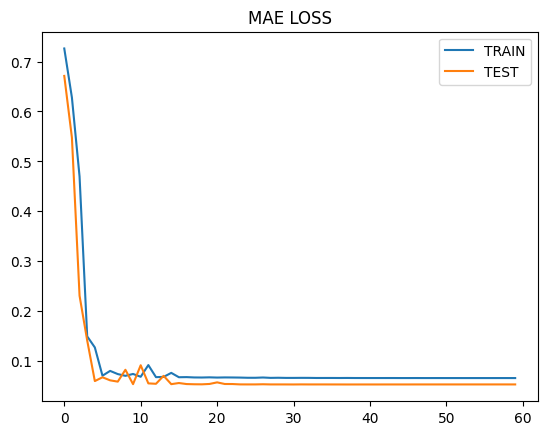

In [51]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [52]:
test_set2 = df_USA['PercentOfBaseline']
test_set2=pd.DataFrame(test_set2)
test_set2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [53]:
# Getting the predicted PercentOfBaseline
size_test2 = int(len(df_USA['PercentOfBaseline'])) + size_train2
dataset_total2 = pd.concat((training_set2['PercentOfBaseline'], test_set2['PercentOfBaseline']), axis = 0)
inputs2 = dataset_total2[len(dataset_total2) - len(test_set2) - size_train2:].values
inputs2 = inputs2.reshape(-1, 1)
inputs2 = sc2.transform(inputs2)
X_test2 = []
for i in range(size_train2, size_test2):
    X_test2.append(inputs2[i-size_train2:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
predicted_ConvLSTM_USA = model_USA_ConvLSTM.predict(X_test2)
predicted_ConvLSTM_USA = sc2.inverse_transform(predicted_ConvLSTM_USA)

4/9 [============>.................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 23ms/step


In [54]:
predicted_ConvLSTM_USA = pd.DataFrame(predicted_ConvLSTM_USA)
predicted_ConvLSTM_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


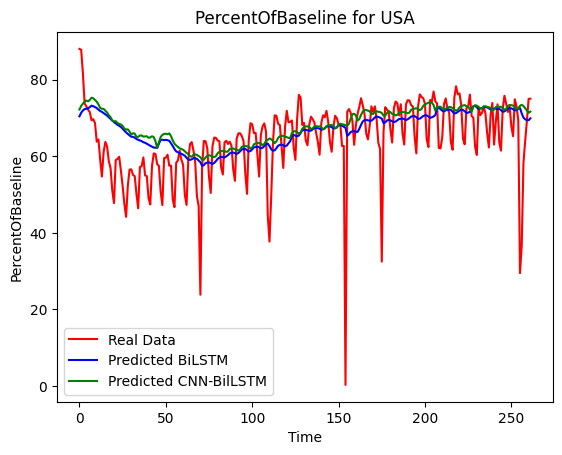

In [55]:
# Visualising the results
plt.plot(df_USA['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_USA, color = 'blue', label = 'Predicted BiLSTM')
plt.plot(predicted_ConvLSTM_USA, color = 'green', label = 'Predicted CNN-BilLSTM')
plt.title('PercentOfBaseline for USA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [56]:
MAE_LSTM_USA = mean_absolute_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
MSE_LSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
MAPE_LSTM_USA = mean_absolute_percentage_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
RMSE_LSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA, squared = False)
R2_LSTM_USA = r2_score(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
print("MAE LSTM USA: ", "%.4f" % MAE_LSTM_USA)
print("MSE LSTM USA:", "%.4f" % MSE_LSTM_USA)
print("MAPE LSTM USA:", "%.4f" % MAPE_LSTM_USA)
print("RMSE LSTM USA:", "%.4f" % RMSE_LSTM_USA)
print("R2 LSTM USA:", "%.4f" % R2_LSTM_USA)

MAE LSTM USA:  6.4397
MSE LSTM USA: 90.4293
MAPE LSTM USA: 1.1396
RMSE LSTM USA: 9.5094
R2 LSTM USA: 0.0856


In [57]:
MAE_ConvLSTM_USA = mean_absolute_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
MSE_ConvLSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
MAPE_ConvLSTM_USA = mean_absolute_percentage_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
RMSE_ConvLSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA, squared = False)
R2_ConvLSTM_USA = r2_score(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
print("MAE ConvLSTM USA:", "%.4f" % MAE_ConvLSTM_USA)
print("MSE ConvSTM USA:", "%.4f" % MSE_ConvLSTM_USA)
print("MAPE ConvLSTM USA:", "%.4f" % MAPE_ConvLSTM_USA)
print("RMSE ConvLSTM USA:", "%.4f" % RMSE_ConvLSTM_USA)
print("R2 ConvLSTM USA:", "%.4f" % R2_ConvLSTM_USA)

MAE ConvLSTM USA: 6.5298
MSE ConvSTM USA: 97.5573
MAPE ConvLSTM USA: 1.1531
RMSE ConvLSTM USA: 9.8771
R2 ConvLSTM USA: 0.0135


**DATASET AUSTRALIA**

In [58]:
dataset_AU = dataset[dataset['Country']=='Australia'].sort_values(by="Date")
dataset_AU.shape

(257, 7)

In [59]:
dataset_AU.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
19,2020-03-16,Kingsford Smith,92,Sydney,New South Wales,AU,Australia
49,2020-03-17,Kingsford Smith,90,Sydney,New South Wales,AU,Australia
60,2020-03-18,Kingsford Smith,97,Sydney,New South Wales,AU,Australia
107,2020-03-19,Kingsford Smith,89,Sydney,New South Wales,AU,Australia
118,2020-03-20,Kingsford Smith,85,Sydney,New South Wales,AU,Australia


In [60]:
dataset_AU.nunique()

Date                 257
AirportName            1
PercentOfBaseline     65
City                   1
State                  1
ISO_3166_2             1
Country                1
dtype: int64

In [61]:
dataset_AU = dataset_AU.set_index('Date')

In [62]:
df_AU = pd.DataFrame(dataset_AU.groupby('Date')['PercentOfBaseline'].mean())
df_AU.shape

(257, 1)

In [63]:
df_AU.head()

,PercentOfBaseline
Date,
2020-03-16,92.0
2020-03-17,90.0
2020-03-18,97.0
2020-03-19,89.0
2020-03-20,85.0


**Model AUSTRALIA LSTM**

In [64]:
training_set3=df_AU['PercentOfBaseline']
training_set3=pd.DataFrame(training_set3)

In [65]:
# Feature Scaling
sc3 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled3 = sc3.fit_transform(training_set3)

In [66]:
# Creating a data structure with 52 timesteps and 1 output
X_train3 = []
y_train3 = []
size_train3 = int(len(df_AU['PercentOfBaseline'])*0.2)
for i in range(size_train3, len(training_set3)):
    X_train3.append(training_set_scaled3[i-size_train3:i, 0])
    y_train3.append(training_set_scaled3[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

In [67]:
# Reshaping
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train3, y_train3, test_size = 0.2, shuffle=True, random_state=42)
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
print(X_train3.shape)

(164, 51, 1)


In [68]:
# Initialising the RNN using LSTM
model_AU_LSTM = Sequential()
model_AU_LSTM.add(Bidirectional(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train3.shape[1], 1))))
model_AU_LSTM.add(Dropout(0.2))
model_AU_LSTM.add(Bidirectional(LSTM(32, activation="relu", return_sequences = False)))
model_AU_LSTM.add(Dense(1))
input_shape3 = X_train3.shape
model_AU_LSTM.build(input_shape3)
model_AU_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (164, 51, 128)           33792     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (164, 51, 128)            0         
                                                                 
 bidirectional_5 (Bidirectio  (164, 64)                41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (164, 1)                  65        
                                                                 
Total params: 75,073
Trainable params: 75,073
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compiling the RNN
# Code here
model_AU_LSTM.compile(optimizer=Nadam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

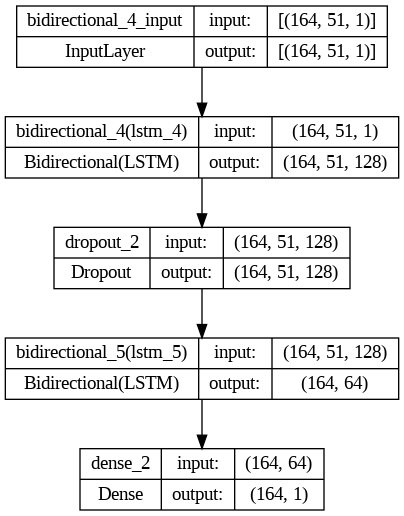

In [70]:
plot_model(model_AU_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [71]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history3 = model_AU_LSTM.fit(X_train3, y_train3, epochs=epoch, batch_size=batch_size, validation_data=(X_test3, y_test3), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 8s 825ms/step - loss: 0.2575 - mse: 0.0998 - rmse: 0.3158 - val_loss: 0.1997 - val_mse: 0.0680 - val_rmse: 0.2607 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 1s 170ms/step - loss: 0.2123 - mse: 0.0738 - rmse: 0.2717 - val_loss: 0.1563 - val_mse: 0.0465 - val_rmse: 0.2156 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 144ms/step - loss: 0.1604 - mse: 0.0461 - rmse: 0.2148 - val_loss: 0.1259 - val_mse: 0.0253 - val_rmse: 0.1591 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 123ms/step - loss: 0.1207 - mse: 0.0234 - rmse: 0.1528 - val_loss: 0.1155 - val_mse: 0.0186 - val_rmse: 0.1365 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 132ms/step - loss: 0.1059 - mse: 0.0164 - rmse: 0.1281 - val_loss: 0.1066 - val_mse: 0.0194 - val_rmse: 0.1393 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 121ms/step - loss: 0.0949 - mse: 0.0149 - rmse: 0.1219 - val_l

In [72]:
yhat3 = model_AU_LSTM.predict(X_test3)

r23 = r2_score(y_test3,yhat3)
mse3 = mean_squared_error(y_test3, yhat3)
mae3 = mean_absolute_error(y_test3,yhat3)
mape3 = mean_absolute_percentage_error(y_test3,yhat3)
rmse3 = np.sqrt(mse3)

print("MAE :" ,"%.4f" %mae3)
print("MSE :", "%.4f" %mse3)
print("RMSE :" ,"%.4f" %rmse3)
print("MAPE :" ,"%.4f" %mape3)
print("R2_score :","%.4f" %r23)

2/2 [==============================] - 1s 31ms/step
MAE : 0.0714
MSE : 0.0137
RMSE : 0.1170
MAPE : 14596542225262.1914
R2_score : 0.5763


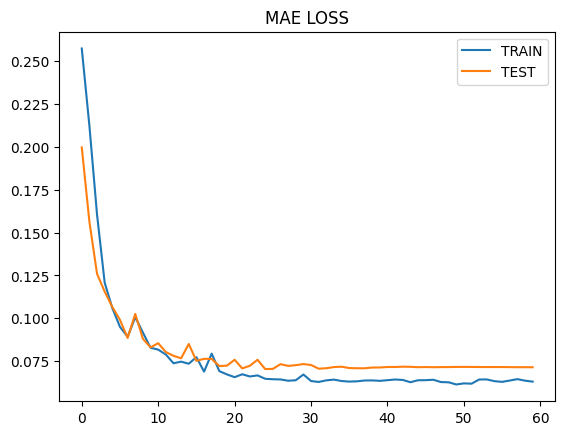

In [73]:
plt.plot(history3.history["loss"])
plt.plot(history3.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [74]:
test_set3 = df_AU['PercentOfBaseline']
test_set3=pd.DataFrame(test_set3)
test_set3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [75]:
# Getting the predicted PercentOfBaseline
size_test3 = int(len(df_AU['PercentOfBaseline'])) + size_train3
dataset_total3 = pd.concat((training_set3['PercentOfBaseline'], test_set3['PercentOfBaseline']), axis = 0)
inputs3 = dataset_total3[len(dataset_total3) - len(test_set3) - size_train3:].values
inputs3 = inputs3.reshape(-1,1)
inputs3 = sc3.transform(inputs3)
X_test3 = []
for i in range(size_train3, size_test3):
    X_test3.append(inputs3[i-size_train3:i, 0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
predicted_LSTM_AU = model_AU_LSTM.predict(X_test3)
predicted_LSTM_AU = sc3.inverse_transform(predicted_LSTM_AU)

4/9 [============>.................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 19ms/step


In [76]:
predicted_LSTM_AU=pd.DataFrame(predicted_LSTM_AU)
predicted_LSTM_AU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


**Model Australia ConvLSTM**

In [77]:
training_set4=df_AU['PercentOfBaseline']
training_set4=pd.DataFrame(training_set4)

In [78]:
# Feature Scaling
sc4 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled4 = sc4.fit_transform(training_set4)

In [79]:
# Creating a data structure with 52 timesteps and 1 output
X_train4 = []
y_train4 = []
size_train4 = int(len(df_USA['PercentOfBaseline'])*0.2)
for i in range(size_train4, len(training_set4)):
    X_train4.append(training_set_scaled4[i-size_train4:i, 0])
    y_train4.append(training_set_scaled4[i, 0])
X_train4, y_train4 = np.array(X_train4), np.array(y_train4)

In [80]:
# Reshaping
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_train4, y_train4, test_size = 0.2, shuffle=True, random_state=42)
X_train4 = np.reshape(X_train4, (X_train4.shape[0], X_train4.shape[1], 1))
X_test4 = np.reshape(X_test4, (X_test4.shape[0], X_test4.shape[1], 1))
print(X_train4.shape)

(164, 52, 1)


In [81]:
# Initialising the CNN using LSTM
model_AU_ConvLSTM = Sequential()
model_AU_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train4.shape[1],1)))
model_AU_ConvLSTM.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
model_AU_ConvLSTM.add(Dropout(0.2))
model_AU_ConvLSTM.add(LSTM(64, activation="relu", return_sequences = True))
model_AU_ConvLSTM.add(LSTM(32, activation="relu", return_sequences = False))
model_AU_ConvLSTM.add(Dense(1))
input_shape4 = X_train4.shape
model_AU_ConvLSTM.build(input_shape4)
model_AU_ConvLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 52, 64)            256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 52, 64)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_6 (LSTM)               (None, 52, 64)            33024     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                      

In [82]:
# Compiling the RNN
# Code here
model_AU_ConvLSTM.compile(optimizer=RMSprop(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

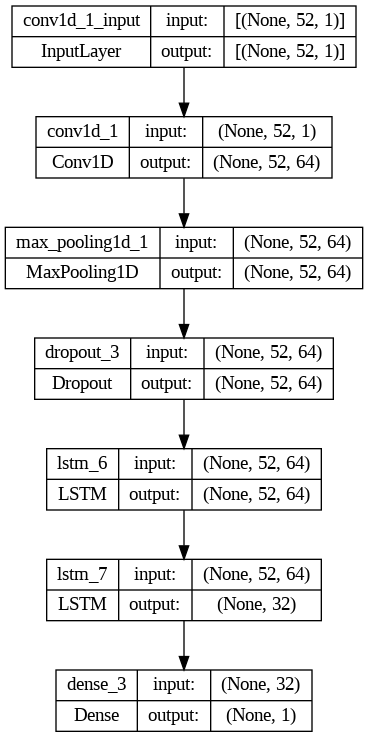

In [83]:
plot_model(model_AU_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [84]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history4 = model_AU_ConvLSTM.fit(X_train4, y_train4, epochs=epoch, batch_size=batch_size, validation_data=(X_test4, y_test4), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 4s 294ms/step - loss: 0.2666 - mse: 0.1077 - rmse: 0.3282 - val_loss: 0.1632 - val_mse: 0.0494 - val_rmse: 0.2223 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 91ms/step - loss: 0.1501 - mse: 0.0423 - rmse: 0.2056 - val_loss: 0.2686 - val_mse: 0.1137 - val_rmse: 0.3372 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 92ms/step - loss: 0.1915 - mse: 0.0682 - rmse: 0.2612 - val_loss: 0.1034 - val_mse: 0.0191 - val_rmse: 0.1382 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 89ms/step - loss: 0.1115 - mse: 0.0213 - rmse: 0.1460 - val_loss: 0.0911 - val_mse: 0.0140 - val_rmse: 0.1182 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 96ms/step - loss: 0.0934 - mse: 0.0131 - rmse: 0.1145 - val_loss: 0.1026 - val_mse: 0.0204 - val_rmse: 0.1427 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 89ms/step - loss: 0.0841 - mse: 0.0131 - rmse: 0.1144 - val_loss: 

In [85]:
yhat4 = model_AU_ConvLSTM.predict(X_test4)

r24 = r2_score(y_test4,yhat4)
mse4 = mean_squared_error(y_test4, yhat4)
mae4 = mean_absolute_error(y_test4,yhat4)
mape4 = mean_absolute_percentage_error(y_test4,yhat4)
rmse4 = np.sqrt(mse4)

print("MAE :" ,"%.4f" %mae4)
print("MSE :", "%.4f" %mse4)
print("RMSE :" ,"%.4f" %rmse4)
print("MAPE :" ,"%.4f" %mape4)
print("R2_score :","%.4f" %r24)

2/2 [==============================] - 0s 13ms/step
MAE : 0.0790
MSE : 0.0149
RMSE : 0.1222
MAPE : 12224697159980.2383
R2_score : 0.4953


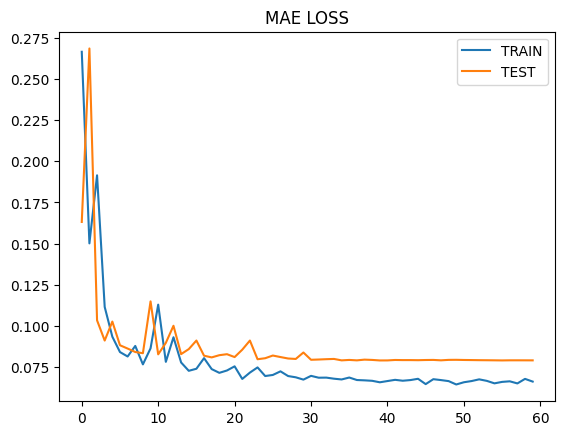

In [86]:
plt.plot(history4.history["loss"])
plt.plot(history4.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [87]:
test_set4 = df_AU['PercentOfBaseline']
test_set4=pd.DataFrame(test_set4)
test_set4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [88]:
# Getting the predicted PercentOfBaseline
size_test4 = int(len(df_AU['PercentOfBaseline'])) + size_train4
dataset_total4 = pd.concat((training_set4['PercentOfBaseline'], test_set4['PercentOfBaseline']), axis = 0)
inputs4 = dataset_total4[len(dataset_total4) - len(test_set4) - size_train4:].values
inputs4 = inputs4.reshape(-1, 1)
inputs4 = sc4.transform(inputs4)
X_test4 = []
for i in range(size_train4, size_test4):
    X_test4.append(inputs4[i-size_train4:i, 0])
X_test4 = np.array(X_test4)
X_test4 = np.reshape(X_test4, (X_test4.shape[0], X_test4.shape[1], 1))
predicted_ConvLSTM_AU = model_AU_ConvLSTM.predict(X_test4)
predicted_ConvLSTM_AU = sc4.inverse_transform(predicted_ConvLSTM_AU)

9/9 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [89]:
predicted_ConvLSTM_AU = pd.DataFrame(predicted_ConvLSTM_AU)
predicted_ConvLSTM_AU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


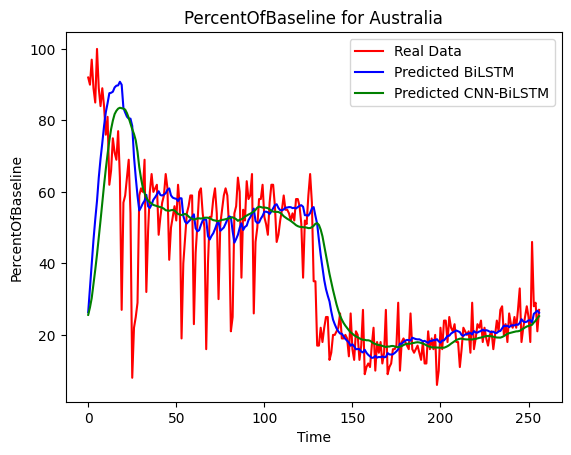

In [90]:
# Visualising the results
plt.plot(df_AU['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_AU, color = 'blue', label = 'Predicted BiLSTM')
plt.plot(predicted_ConvLSTM_AU, color = 'green', label = 'Predicted CNN-BiLSTM')
plt.title('PercentOfBaseline for Australia')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [91]:
MAE_LSTM_AU = mean_absolute_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
MSE_LSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
MAPE_LSTM_AU = mean_absolute_percentage_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
RMSE_LSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU, squared = False)
R2_LSTM_AU = r2_score(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
print("MAE LSTM AU:", "%.4f" %MAE_LSTM_AU)
print("MSE LSTM AU:", "%.4f" %MSE_LSTM_AU)
print("MAPE LSTM AU:", "%.4f" %MAPE_LSTM_AU)
print("RMSE LSTM AU:", "%.4f" %RMSE_LSTM_AU)
print("R2 LSTM AU:", "%.4f" %R2_LSTM_AU)

MAE LSTM AU: 8.7893
MSE LSTM AU: 213.5865
MAPE LSTM AU: 0.3110
RMSE LSTM AU: 14.6146
R2 LSTM AU: 0.5488


In [92]:
MAE_ConvLSTM_AU = mean_absolute_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
MSE_ConvLSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
MAPE_ConvLSTM_AU = mean_absolute_percentage_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
RMSE_ConvLSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU, squared = False)
R2_ConvLSTM_AU = r2_score(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
print("MAE ConvLSTM AU:", "%.4f" % MAE_ConvLSTM_AU)
print("MSE ConvSTM AU:", "%.4f" % MSE_ConvLSTM_AU)
print("MAPE ConvLSTM AU:", "%.4f" % MAPE_ConvLSTM_AU)
print("RMSE ConvLSTM AU:", "%.4f" % RMSE_ConvLSTM_AU)
print("R2 ConvLSTM AU:", "%.4f" % R2_ConvLSTM_AU)

MAE ConvLSTM AU: 9.4351
MSE ConvSTM AU: 254.0066
MAPE ConvLSTM AU: 0.3367
RMSE ConvLSTM AU: 15.9376
R2 ConvLSTM AU: 0.4634


**DATASET CHILE**

In [93]:
dataset_CH = dataset[dataset['Country']=='Chile'].sort_values(by="Date")
dataset_CH.shape

(238, 7)

In [94]:
dataset_CH.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
0,2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,CL,Chile
44,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,CL,Chile
72,2020-03-18,Santiago International Airport,56,Santiago,Santiago Province,CL,Chile
103,2020-03-19,Santiago International Airport,52,Santiago,Santiago Province,CL,Chile
135,2020-03-20,Santiago International Airport,53,Santiago,Santiago Province,CL,Chile


In [95]:
dataset_CH.nunique()

Date                 238
AirportName            1
PercentOfBaseline     61
City                   1
State                  1
ISO_3166_2             1
Country                1
dtype: int64

In [96]:
dataset_CH = dataset_CH.set_index('Date')

In [97]:
df_CH = pd.DataFrame(dataset_CH.groupby('Date')['PercentOfBaseline'].mean())
df_CH.shape

(238, 1)

In [98]:
df_CH.head()

,PercentOfBaseline
Date,
2020-03-16,96.0
2020-03-17,72.0
2020-03-18,56.0
2020-03-19,52.0
2020-03-20,53.0


**Model CHILE LSTM**

In [99]:
training_set5=df_CH['PercentOfBaseline']
training_set5=pd.DataFrame(training_set5)

In [100]:
# Feature Scaling
sc5 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled5 = sc5.fit_transform(training_set5)

In [101]:
# Creating a data structure with 52 timesteps and 1 output
X_train5 = []
y_train5 = []
size_train5 = int(len(df_CH['PercentOfBaseline'])*0.2)
for i in range(size_train5, len(training_set5)):
    X_train5.append(training_set_scaled5[i-size_train5:i, 0])
    y_train5.append(training_set_scaled5[i, 0])
X_train5, y_train5 = np.array(X_train5), np.array(y_train5)

In [102]:
# Reshaping
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_train5, y_train5, test_size = 0.2, shuffle=True, random_state=42)
X_train5 = np.reshape(X_train5, (X_train5.shape[0], X_train5.shape[1], 1))
X_test5 = np.reshape(X_test5, (X_test5.shape[0], X_test5.shape[1], 1))
print(X_train5.shape)

(152, 47, 1)


In [103]:
# Initialising the RNN using LSTM
model_CH_LSTM = Sequential()
model_CH_LSTM.add(Bidirectional(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train5.shape[1], 1))))
model_CH_LSTM.add(Dropout(0.2))
model_CH_LSTM.add(Bidirectional(LSTM(32, activation="relu", return_sequences = False)))
model_CH_LSTM.add(Dense(1))
input_shape5 = X_train5.shape
model_CH_LSTM.build(input_shape5)
model_CH_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (152, 47, 128)           33792     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (152, 47, 128)            0         
                                                                 
 bidirectional_7 (Bidirectio  (152, 64)                41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (152, 1)                  65        
                                                                 
Total params: 75,073
Trainable params: 75,073
Non-trainable params: 0
_________________________________________________________________


In [104]:
# Compiling the RNN
# Code here
model_CH_LSTM.compile(optimizer=Adam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

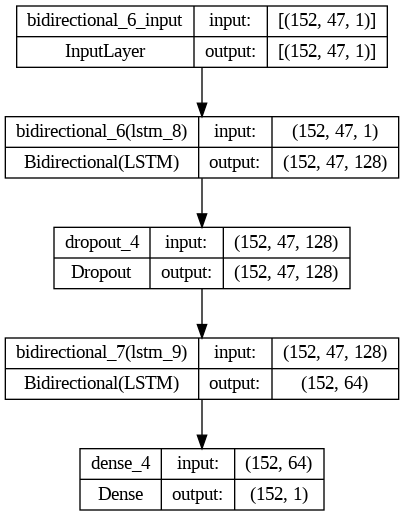

In [105]:
plot_model(model_CH_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [106]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history5 = model_CH_LSTM.fit(X_train5, y_train5, epochs=epoch, batch_size=batch_size, validation_data=(X_test5, y_test5), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 7s 463ms/step - loss: 0.3518 - mse: 0.1468 - rmse: 0.3832 - val_loss: 0.3107 - val_mse: 0.1187 - val_rmse: 0.3446 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 141ms/step - loss: 0.3000 - mse: 0.1108 - rmse: 0.3328 - val_loss: 0.2607 - val_mse: 0.0876 - val_rmse: 0.2959 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 128ms/step - loss: 0.2466 - mse: 0.0792 - rmse: 0.2815 - val_loss: 0.2024 - val_mse: 0.0564 - val_rmse: 0.2375 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 135ms/step - loss: 0.1831 - mse: 0.0488 - rmse: 0.2210 - val_loss: 0.1366 - val_mse: 0.0267 - val_rmse: 0.1633 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 139ms/step - loss: 0.1104 - mse: 0.0195 - rmse: 0.1395 - val_loss: 0.0954 - val_mse: 0.0155 - val_rmse: 0.1247 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 134ms/step - loss: 0.1167 - mse: 0.0209 - rmse: 0.1447 - val_l

In [107]:
yhat5 = model_CH_LSTM.predict(X_test5)

r25 = r2_score(y_test5,yhat5)
mse5 = mean_squared_error(y_test5, yhat5)
mae5 = mean_absolute_error(y_test5,yhat5)
mape5 = mean_absolute_percentage_error(y_test5,yhat5)
rmse5 = np.sqrt(mse5)

print("MAE :" ,"%.4f" %mae5)
print("MSE :","%.4f" %mse5)
print("RMSE :" ,"%.4f" %rmse5)
print("MAPE :" ,"%.4f" %mape5)
print("R2_score :","%.4f" %r25)

2/2 [==============================] - 3s 36ms/step
MAE : 0.0868
MSE : 0.0125
RMSE : 0.1116
MAPE : 0.4380
R2_score : 0.4654


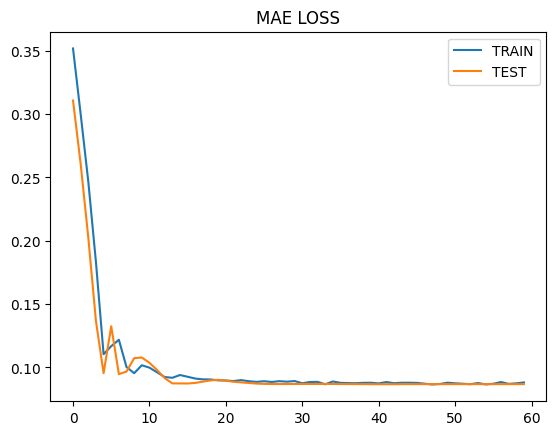

In [108]:
plt.plot(history5.history["loss"])
plt.plot(history5.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [109]:
test_set5 = df_CH['PercentOfBaseline']
test_set5=pd.DataFrame(test_set5)
test_set5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  238 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [110]:
# Getting the predicted PercentOfBaseline
size_test5 = int(len(df_CH['PercentOfBaseline'])) + size_train5
dataset_total5 = pd.concat((training_set5['PercentOfBaseline'], test_set5['PercentOfBaseline']), axis = 0)
inputs5 = dataset_total5[len(dataset_total5) - len(test_set5) - size_train5:].values
inputs5 = inputs5.reshape(-1,1)
inputs5 = sc5.transform(inputs5)
X_test5 = []
for i in range(size_train5, size_test5):
    X_test5.append(inputs5[i-size_train5:i, 0])
X_test5 = np.array(X_test5)
X_test5 = np.reshape(X_test5, (X_test5.shape[0], X_test5.shape[1], 1))
predicted_LSTM_CH = model_CH_LSTM.predict(X_test5)
predicted_LSTM_CH = sc5.inverse_transform(predicted_LSTM_CH)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


8/8 [==============================] - 1s 58ms/step


In [111]:
predicted_LSTM_CH=pd.DataFrame(predicted_LSTM_CH)
predicted_LSTM_CH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


**Model CHILE ConvLSTM**

In [112]:
training_set6=df_CH['PercentOfBaseline']
training_set6=pd.DataFrame(training_set6)

In [113]:
# Feature Scaling
sc6 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled6 = sc6.fit_transform(training_set6)

In [114]:
# Creating a data structure with 52 timesteps and 1 output
X_train6 = []
y_train6 = []
size_train6 = int(len(df_CH['PercentOfBaseline'])*0.2)
for i in range(size_train6, len(training_set6)):
    X_train6.append(training_set_scaled6[i-size_train6:i, 0])
    y_train6.append(training_set_scaled6[i, 0])
X_train6, y_train6 = np.array(X_train6), np.array(y_train6)

In [115]:
# Reshaping
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_train6, y_train6, test_size = 0.2, shuffle=True, random_state=42)
X_train6 = np.reshape(X_train6, (X_train6.shape[0], X_train6.shape[1], 1))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], X_test6.shape[1], 1))
print(X_train6.shape)

(152, 47, 1)


In [116]:
# Initialising the CNN using LSTM
model_CH_ConvLSTM = Sequential()
model_CH_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train6.shape[1],1)))
model_CH_ConvLSTM.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
model_CH_ConvLSTM.add(Dropout(0.2))
model_CH_ConvLSTM.add(Bidirectional(LSTM(64, activation="relu", return_sequences = True)))
model_CH_ConvLSTM.add(Bidirectional(LSTM(32, activation="relu", return_sequences = False)))
model_CH_ConvLSTM.add(Dense(1))
input_shape6 = X_train6.shape
model_CH_ConvLSTM.build(input_shape6)
model_CH_ConvLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 47, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 47, 64)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 47, 64)            0         
                                                                 
 bidirectional_8 (Bidirectio  (None, 47, 128)          66048     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                      

In [117]:
# Compiling the RNN
# Code here
model_CH_ConvLSTM.compile(optimizer=RMSprop(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

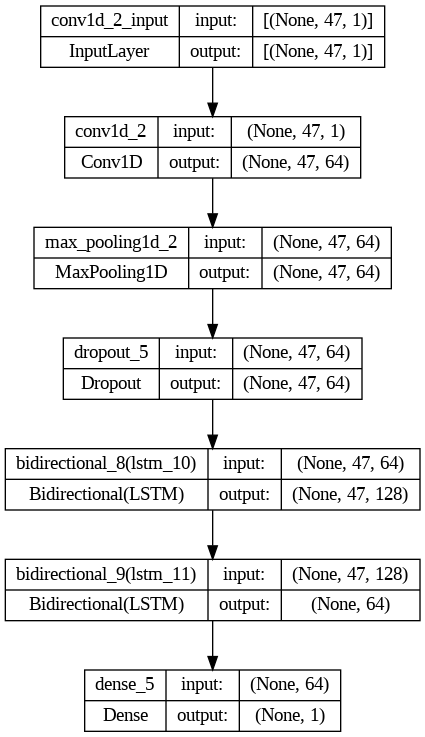

In [118]:
plot_model(model_CH_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [119]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history6 = model_CH_ConvLSTM.fit(X_train6, y_train6, epochs=epoch, batch_size=batch_size, validation_data=(X_test6, y_test6), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 7s 483ms/step - loss: 0.2852 - mse: 0.1080 - rmse: 0.3286 - val_loss: 0.0888 - val_mse: 0.0129 - val_rmse: 0.1135 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 125ms/step - loss: 0.1021 - mse: 0.0156 - rmse: 0.1247 - val_loss: 0.1438 - val_mse: 0.0284 - val_rmse: 0.1686 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 133ms/step - loss: 0.1129 - mse: 0.0197 - rmse: 0.1405 - val_loss: 0.0875 - val_mse: 0.0133 - val_rmse: 0.1154 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 144ms/step - loss: 0.0879 - mse: 0.0122 - rmse: 0.1106 - val_loss: 0.1109 - val_mse: 0.0172 - val_rmse: 0.1312 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - ETA: 0s - loss: 0.0896 - mse: 0.0129 - rmse: 0.1134
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
3/3 [==============================] - 0s 124ms/step - loss: 0.0896 - mse: 0.0129 - rmse: 0.1134 - val_loss: 0.092

In [120]:
yhat6 = model_CH_ConvLSTM.predict(X_test6)

r26 = r2_score(y_test6,yhat6)
mse6 = mean_squared_error(y_test6, yhat6)
mae6 = mean_absolute_error(y_test6,yhat6)
mape6 = mean_absolute_percentage_error(y_test6,yhat6)
rmse6 = np.sqrt(mse6)

print("MAE :" ,"%.4f" %mae6)
print("MSE :", "%.4f" %mse6)
print("RMSE :" ,"%.4f" %rmse6)
print("MAPE :" ,"%.4f" %mape6)
print("R2_score :","%.4f" %r26)

2/2 [==============================] - 1s 17ms/step
MAE : 0.0899
MSE : 0.0129
RMSE : 0.1134
MAPE : 0.4461
R2_score : 0.4477


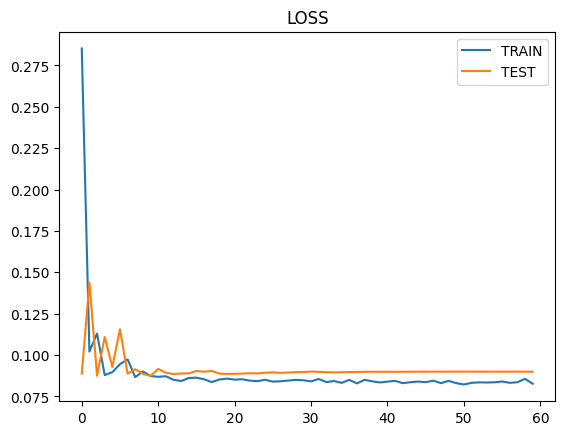

In [121]:
plt.plot(history6.history["loss"])
plt.plot(history6.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [122]:
test_set6 = df_CH['PercentOfBaseline']
test_set6=pd.DataFrame(test_set6)
test_set6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  238 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [123]:
# Getting the predicted PercentOfBaseline
size_test6 = int(len(df_CH['PercentOfBaseline'])) + size_train6
dataset_total6 = pd.concat((training_set6['PercentOfBaseline'], test_set6['PercentOfBaseline']), axis = 0)
inputs6 = dataset_total6[len(dataset_total6) - len(test_set6) - size_train6:].values
inputs6 = inputs6.reshape(-1, 1)
inputs6 = sc6.transform(inputs6)
X_test6 = []
for i in range(size_train6, size_test6):
    X_test6.append(inputs6[i-size_train6:i, 0])
X_test6 = np.array(X_test6)
X_test6 = np.reshape(X_test6, (X_test6.shape[0], X_test6.shape[1], 1))
predicted_ConvLSTM_CH = model_CH_ConvLSTM.predict(X_test6)
predicted_ConvLSTM_CH = sc6.inverse_transform(predicted_ConvLSTM_CH)

4/8 [==============>...............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


8/8 [==============================] - 0s 21ms/step


In [124]:
predicted_ConvLSTM_CH = pd.DataFrame(predicted_ConvLSTM_CH)
predicted_ConvLSTM_CH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


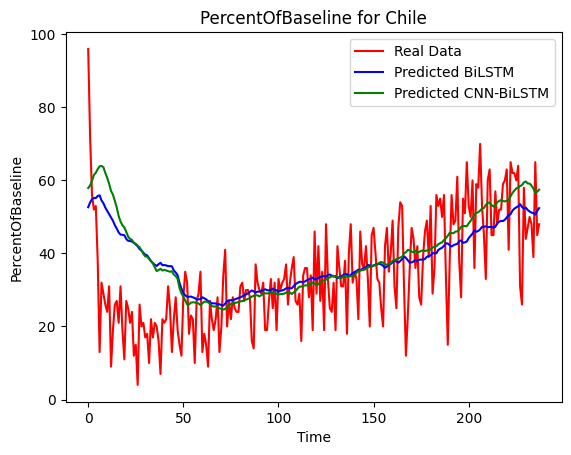

In [125]:
# Visualising the results
plt.plot(df_CH['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_CH, color = 'blue', label = 'Predicted BiLSTM')
plt.plot(predicted_ConvLSTM_CH, color = 'green', label = 'Predicted CNN-BiLSTM')
plt.title('PercentOfBaseline for Chile')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [126]:
MAE_LSTM_CH = mean_absolute_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
MSE_LSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
MAPE_LSTM_CH = mean_absolute_percentage_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
RMSE_LSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH, squared = False)
R2_LSTM_CH = r2_score(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
print("MAE LSTM CH:", "%.4f" %MAE_LSTM_CH)
print("MSE LSTM CH:", "%.4f" %MSE_LSTM_CH)
print("MAPE LSTM CH:", "%.4f" %MAPE_LSTM_CH)
print("RMSE LSTM CH:", "%.4f" %RMSE_LSTM_CH)
print("R2 LSTM CH:", "%.4f" %R2_LSTM_CH)

MAE LSTM CH: 10.5877
MSE LSTM CH: 184.7379
MAPE LSTM CH: 0.4928
RMSE LSTM CH: 13.5918
R2 LSTM CH: 0.1651


In [127]:
MAE_ConvLSTM_CH = mean_absolute_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
MSE_ConvLSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
MAPE_ConvLSTM_CH = mean_absolute_percentage_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
RMSE_ConvLSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH, squared = False)
R2_ConvLSTM_CH = r2_score(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
print("MAE ConvLSTM CH:", "%.4f" % MAE_ConvLSTM_CH)
print("MSE ConvSTM CH:", "%.4f" % MSE_ConvLSTM_CH)
print("MAPE ConvLSTM CH:", "%.4f" % MAPE_ConvLSTM_CH)
print("RMSE ConvLSTM CH:", "%.4f" % RMSE_ConvLSTM_CH)
print("R2 ConvLSTM CH:", "%.4f" % R2_ConvLSTM_CH)

MAE ConvLSTM CH: 10.8329
MSE ConvSTM CH: 205.4111
MAPE ConvLSTM CH: 0.5080
RMSE ConvLSTM CH: 14.3322
R2 ConvLSTM CH: 0.0717


**DATASET CANADA**

In [128]:
dataset_CN = dataset[dataset['Country']=='Canada'].sort_values(by="Date")
dataset_CN.shape

(2311, 7)

In [129]:
dataset_CN.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
1,2020-03-16,Halifax International,72,Halifax,Nova Scotia,CA-NS,Canada
7,2020-03-16,Edmonton International,63,Leduc County,Alberta,CA-AB,Canada
10,2020-03-16,Montreal Mirabel,100,Mirabel,Quebec,CA-QC,Canada
11,2020-03-16,Vancouver International,100,Richmond,British Columbia,CA-BC,Canada
20,2020-03-16,Montreal Trudeau,100,Dorval,Quebec,CA-QC,Canada


In [130]:
dataset_CN.nunique()

Date                 262
AirportName            9
PercentOfBaseline     95
City                   9
State                  6
ISO_3166_2             6
Country                1
dtype: int64

In [131]:
dataset_CN = dataset_CN.set_index('Date')

In [132]:
df_CN = pd.DataFrame(dataset_CN.groupby('Date')['PercentOfBaseline'].mean())
df_CN.shape

(262, 1)

In [133]:
df_CN.head()

,PercentOfBaseline
Date,
2020-03-16,92.333333
2020-03-17,87.888889
2020-03-18,88.000000
2020-03-19,84.777778
2020-03-20,86.666667


**Model CANADA LSTM**

In [134]:
training_set7=df_CN['PercentOfBaseline']
training_set7=pd.DataFrame(training_set7)

In [135]:
# Feature Scaling
sc7 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled7 = sc7.fit_transform(training_set7)

In [136]:
# Creating a data structure with 52 timesteps and 1 output
X_train7 = []
y_train7 = []
size_train7 = int(len(df_CN['PercentOfBaseline'])*0.2)
for i in range(size_train7, len(training_set7)):
    X_train7.append(training_set_scaled7[i-size_train7:i, 0])
    y_train7.append(training_set_scaled7[i, 0])
X_train7, y_train7 = np.array(X_train7), np.array(y_train7)

In [137]:
# Reshaping
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_train7, y_train7, test_size = 0.2, shuffle=True, random_state=42)
X_train7 = np.reshape(X_train7, (X_train7.shape[0], X_train7.shape[1], 1))
X_test7 = np.reshape(X_test7, (X_test7.shape[0], X_test7.shape[1], 1))
print(X_train7.shape)

(168, 52, 1)


In [138]:
# Initialising the RNN using LSTM
model_CN_LSTM = Sequential()
model_CN_LSTM.add(Bidirectional(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train7.shape[1], 1))))
model_CN_LSTM.add(Dropout(0.2))
model_CN_LSTM.add(Bidirectional(LSTM(32, activation="relu", return_sequences = False)))
model_CN_LSTM.add(Dense(1))
input_shape7 = X_train7.shape
model_CN_LSTM.build(input_shape7)
model_CN_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (168, 52, 128)           33792     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (168, 52, 128)            0         
                                                                 
 bidirectional_11 (Bidirecti  (168, 64)                41216     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (168, 1)                  65        
                                                                 
Total params: 75,073
Trainable params: 75,073
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compiling the RNN
# Code here
model_CN_LSTM.compile(optimizer=Nadam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

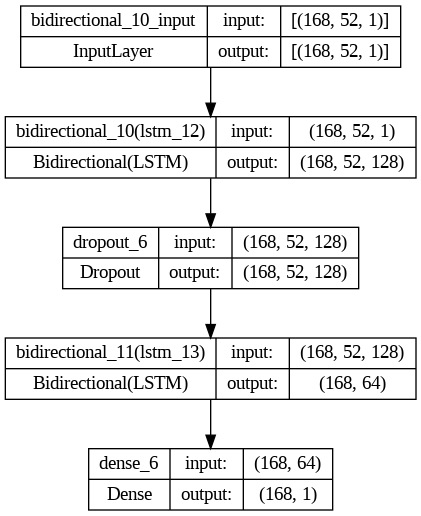

In [140]:
plot_model(model_CN_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [141]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history7 = model_CN_LSTM.fit(X_train7, y_train7, epochs=epoch, batch_size=batch_size, validation_data=(X_test7, y_test7), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 8s 455ms/step - loss: 0.7459 - mse: 0.5774 - rmse: 0.7599 - val_loss: 0.6775 - val_mse: 0.4774 - val_rmse: 0.6909 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 147ms/step - loss: 0.6273 - mse: 0.4120 - rmse: 0.6419 - val_loss: 0.5387 - val_mse: 0.3084 - val_rmse: 0.5553 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 129ms/step - loss: 0.4683 - mse: 0.2336 - rmse: 0.4833 - val_loss: 0.2744 - val_mse: 0.0872 - val_rmse: 0.2953 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 151ms/step - loss: 0.1844 - mse: 0.0502 - rmse: 0.2240 - val_loss: 0.1555 - val_mse: 0.0312 - val_rmse: 0.1767 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 126ms/step - loss: 0.1183 - mse: 0.0274 - rmse: 0.1657 - val_loss: 0.0982 - val_mse: 0.0193 - val_rmse: 0.1388 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 130ms/step - loss: 0.0994 - mse: 0.0251 - rmse: 0.1585 - val_l

In [142]:
yhat7 = model_CN_LSTM.predict(X_test7)

r27 = r2_score(y_test7,yhat7)
mse7 = mean_squared_error(y_test7, yhat7)
mae7 = mean_absolute_error(y_test7,yhat7)
mape7 = mean_absolute_percentage_error(y_test7,yhat7)
rmse7 = np.sqrt(mse7)

print("MAE :" , "%.4f" %mae7)
print("MSE :", "%.4f" %mse7)
print("RMSE :" , "%.4f" %rmse7)
print("MAPE :" , "%.4f" %mape7)
print("R2_score :", "%.4f" %r27)

2/2 [==============================] - 1s 17ms/step
MAE : 0.1000
MSE : 0.0183
RMSE : 0.1354
MAPE : 0.1516
R2_score : 0.0223


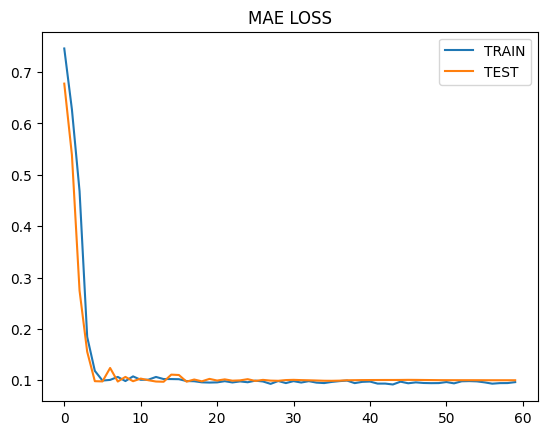

In [143]:
plt.plot(history7.history["loss"])
plt.plot(history7.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [144]:
test_set7 = df_CN['PercentOfBaseline']
test_set7=pd.DataFrame(test_set7)
test_set7.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [145]:
# Getting the predicted PercentOfBaseline
size_test7 = int(len(df_CN['PercentOfBaseline'])) + size_train7
dataset_total7 = pd.concat((training_set7['PercentOfBaseline'], test_set7['PercentOfBaseline']), axis = 0)
inputs7 = dataset_total7[len(dataset_total7) - len(test_set7) - size_train7:].values
inputs7 = inputs7.reshape(-1,1)
inputs7 = sc7.transform(inputs7)
X_test7 = []
for i in range(size_train7, size_test7):
    X_test7.append(inputs7[i-size_train7:i, 0])
X_test7 = np.array(X_test7)
X_test7 = np.reshape(X_test7, (X_test7.shape[0], X_test7.shape[1], 1))
predicted_LSTM_CN = model_CN_LSTM.predict(X_test7)
predicted_LSTM_CN = sc7.inverse_transform(predicted_LSTM_CN)

4/9 [============>.................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 20ms/step


In [146]:
predicted_LSTM_CN=pd.DataFrame(predicted_LSTM_CN)
predicted_LSTM_CN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


**Model CANADA ConvLSTM**

In [147]:
training_set8=df_CN['PercentOfBaseline']
training_set8=pd.DataFrame(training_set8)

In [148]:
# Feature Scaling
sc8 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled8 = sc8.fit_transform(training_set8)

In [149]:
# Creating a data structure with 52 timesteps and 1 output
X_train8 = []
y_train8 = []
size_train8 = int(len(df_CN['PercentOfBaseline'])*0.2)
for i in range(size_train8, len(training_set8)):
    X_train8.append(training_set_scaled8[i-size_train8:i, 0])
    y_train8.append(training_set_scaled8[i, 0])
X_train8, y_train8 = np.array(X_train8), np.array(y_train8)

In [150]:
# Reshaping
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_train8, y_train8, test_size = 0.2, shuffle=True, random_state=42)
X_train8 = np.reshape(X_train8, (X_train8.shape[0], X_train8.shape[1], 1))
X_test8 = np.reshape(X_test8, (X_test8.shape[0], X_test8.shape[1], 1))
print(X_train8.shape)

(168, 52, 1)


In [151]:
# Initialising the CNN using LSTM
model_CN_ConvLSTM = Sequential()
model_CN_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train8.shape[1],1)))
model_CN_ConvLSTM.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
model_CN_ConvLSTM.add(Dropout(0.2))
model_CN_ConvLSTM.add(Bidirectional(LSTM(64, activation="relu", return_sequences = True)))
model_CN_ConvLSTM.add(Bidirectional(LSTM(32, activation="relu", return_sequences = False)))
model_CN_ConvLSTM.add(Dense(1))
input_shape8 = X_train1.shape
model_CN_ConvLSTM.build(input_shape8)
model_CN_ConvLSTM.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 52, 64)            256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 52, 64)           0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 52, 64)            0         
                                                                 
 bidirectional_12 (Bidirecti  (None, 52, 128)          66048     
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                      

In [152]:
# Compiling the RNN
# Code here
model_CN_ConvLSTM.compile(optimizer=Adam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

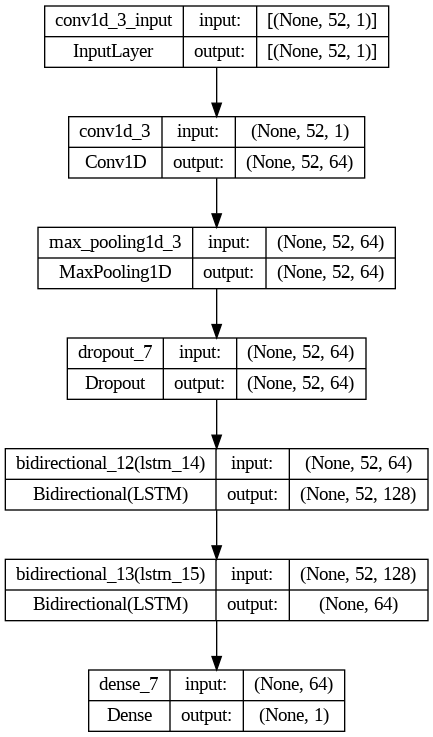

In [153]:
plot_model(model_CN_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [154]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history8 = model_CN_ConvLSTM.fit(X_train8, y_train8, epochs=epoch, batch_size=batch_size, validation_data=(X_test8, y_test8), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 6s 512ms/step - loss: 0.7327 - mse: 0.5604 - rmse: 0.7486 - val_loss: 0.6455 - val_mse: 0.4348 - val_rmse: 0.6594 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 170ms/step - loss: 0.5771 - mse: 0.3520 - rmse: 0.5933 - val_loss: 0.4564 - val_mse: 0.2240 - val_rmse: 0.4733 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 152ms/step - loss: 0.3577 - mse: 0.1432 - rmse: 0.3784 - val_loss: 0.1413 - val_mse: 0.0265 - val_rmse: 0.1627 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 1s 177ms/step - loss: 0.1505 - mse: 0.0413 - rmse: 0.2033 - val_loss: 0.1592 - val_mse: 0.0405 - val_rmse: 0.2013 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 1s 239ms/step - loss: 0.1409 - mse: 0.0415 - rmse: 0.2036 - val_loss: 0.1309 - val_mse: 0.0227 - val_rmse: 0.1506 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 1s 283ms/step - loss: 0.1331 - mse: 0.0275 - rmse: 0.1660 - val_l

In [155]:
yhat8 = model_CN_ConvLSTM.predict(X_test8)

r28 = r2_score(y_test8,yhat8)
mse8 = mean_squared_error(y_test8, yhat8)
mae8 = mean_absolute_error(y_test8,yhat8)
mape8 = mean_absolute_percentage_error(y_test8,yhat8)
rmse8 = np.sqrt(mse8)

print("MAE :" , "%.4f" %mae8)
print("MSE :", "%.4f" %mse8)
print("RMSE :" , "%.4f" %rmse8)
print("MAPE :" , "%.4f" %mape8)
print("R2_score :", "%.4f" %r28)

2/2 [==============================] - 1s 17ms/step
MAE : 0.0997
MSE : 0.0174
RMSE : 0.1320
MAPE : 0.1494
R2_score : 0.0708


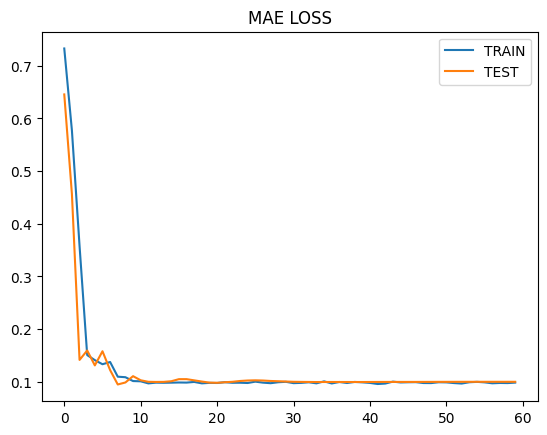

In [156]:
plt.plot(history8.history["loss"])
plt.plot(history8.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [157]:
test_set8 = df_CN['PercentOfBaseline']
test_set8=pd.DataFrame(test_set8)
test_set8.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [158]:
# Getting the predicted PercentOfBaseline
size_test8 = int(len(df_CN['PercentOfBaseline'])) + size_train8
dataset_total8 = pd.concat((training_set8['PercentOfBaseline'], test_set8['PercentOfBaseline']), axis = 0)
inputs8 = dataset_total8[len(dataset_total8) - len(test_set8) - size_train8:].values
inputs8 = inputs8.reshape(-1, 1)
inputs8 = sc8.transform(inputs8)
X_test8 = []
for i in range(size_train8, size_test8):
    X_test8.append(inputs8[i-size_train8:i, 0])
X_test8 = np.array(X_test8)
X_test8 = np.reshape(X_test8, (X_test8.shape[0], X_test8.shape[1], 1))
predicted_ConvLSTM_CN = model_CN_ConvLSTM.predict(X_test8)
predicted_ConvLSTM_CN = sc8.inverse_transform(predicted_ConvLSTM_CN)

6/9 [===================>..........] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 24ms/step


In [159]:
predicted_ConvLSTM_CN = pd.DataFrame(predicted_ConvLSTM_CN)
predicted_ConvLSTM_CN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


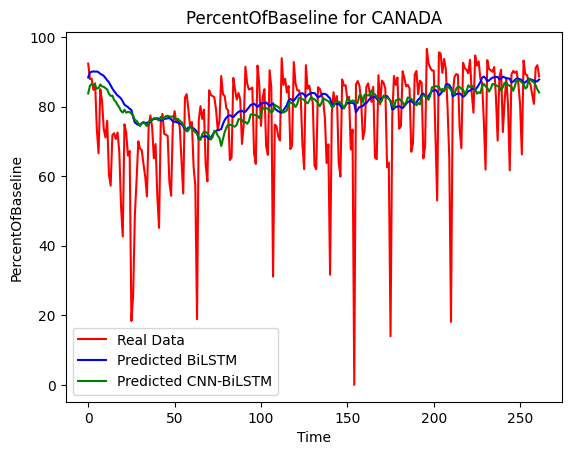

In [160]:
# Visualising the results
plt.plot(df_CN['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_CN, color = 'blue', label = 'Predicted BiLSTM')
plt.plot(predicted_ConvLSTM_CN, color = 'green', label = 'Predicted CNN-BiLSTM')
plt.title('PercentOfBaseline for CANADA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [161]:
MAE_LSTM_CN = mean_absolute_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
MSE_LSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
MAPE_LSTM_CN = mean_absolute_percentage_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
RMSE_LSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN, squared = False)
R2_LSTM_CN = r2_score(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
print("MAE LSTM CN:", "%.4f" %MAE_LSTM_CN)
print("MSE LSTM CN:", "%.4f" %MSE_LSTM_CN)
print("MAPE LSTM CN:", "%.4f" %MAPE_LSTM_CN)
print("RMSE LSTM CN:", "%.4f" %RMSE_LSTM_CN)
print("R2 LSTM CN:", "%.4f" %R2_LSTM_CN)

MAE LSTM CN: 10.0676
MSE LSTM CN: 230.3875
MAPE LSTM CN: 1390036330081397.2500
RMSE LSTM CN: 15.1785
R2 LSTM CN: -0.0377


In [162]:
MAE_ConvLSTM_CN = mean_absolute_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
MSE_ConvLSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
MAPE_ConvLSTM_CN = mean_absolute_percentage_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
RMSE_ConvLSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN, squared = False)
R2_ConvLSTM_CN = r2_score(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
print("MAE ConvLSTM CN:", "%.4f" % MAE_ConvLSTM_CN)
print("MSE ConvSTM CN:", "%.4f" % MSE_ConvLSTM_CN)
print("MAPE ConvLSTM CN:", "%.4f" % MAPE_ConvLSTM_CN)
print("RMSE ConvLSTM CN:", "%.4f" % RMSE_ConvLSTM_CN)
print("R2 ConvLSTM CN:", "%.4f" % R2_ConvLSTM_CN)

MAE ConvLSTM CN: 10.0824
MSE ConvSTM CN: 223.3381
MAPE ConvLSTM CN: 1402000338523519.0000
RMSE ConvLSTM CN: 14.9445
R2 ConvLSTM CN: -0.0059
